In [ ]:
# time series models would be :-
# 1. auto regressive model
# 2. moving average

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
match_path='/content/matches.csv'
matches_df=pd.read_csv(match_path)
#matches_df.head()
# data preparation
matches_df['date']= pd.to_datetime(matches_df['date'])
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# reshape and calculate team metrics
team_performance = matches_df.melt(
    id_vars=['id','season','date','winner','result_margin','target_runs'],
    value_vars=['team1','team2',],
    var_name='home_or_away',
    value_name='team'
)

team_performance['is_winner']= (team_performance['team']==team_performance['winner']).astype(int)
team_performance['runs_scored']= team_performance['target_runs']
team_performance['runs_conceded']= team_performance.groupby('id')['target_runs'].transform('sum')-team_performance['target_runs']

team_performance.head()

,id,season,date,winner,result_margin,target_runs,home_or_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Daredevils,9.0,130.0,team1,Delhi Daredevils,1,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [ ]:
#aggreated data for each team
team_performance_agg=team_performance.groupby(['team','date']).agg({
    'is_winner':'sum',
    'runs_scored':'sum',
    'runs_conceded':'sum'
}).sort_values('date').reset_index()
team_performance_agg['net_run_rate']=team_performance_agg['runs_scored']-team_performance_agg['runs_conceded']
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
2,Delhi Daredevils,2008-04-19,1,130.0,130.0,0.0
3,Rajasthan Royals,2008-04-19,0,130.0,130.0,0.0
4,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Bengaluru,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [ ]:
team_name='Kolkata Knight Riders'
team_data=team_performance_agg[team_performance_agg['team']==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
8,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
22,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
30,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
36,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2167,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [ ]:
team_data = team_data.sort_values('date')

team_data.set_index('date', inplace=True)
team_data

,team,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


In [ ]:
# Select the column to predict (runs scored )
time_series = team_data['runs_scored']

#stationarity check (ADF Test)
adf_result= adfuller(time_series)
print('ADF Statistic', adf_result[0])
print('p-value', adf_result[1])
if adf_result[1]> 0.05:
  print('the series is not stationary . differencing is required')



ADF Statistic -7.214074913565808
p-value 2.1963196715516396e-10


In [ ]:
if adf_result[1]>0.05:
  time_series_diff = time_series.diff().dropna()
else:
    time_series_diff=time_series

In [ ]:
train_size= int(len(time_series_diff)*0.8)
train, test = time_series_diff[:train_size], time_series_diff[train_size:]

In [ ]:
model = ARIMA(train , order =(1,1,1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = fitted_model.forecast(steps=len(test))
forecast.index= test.index
#forecast.head(5)
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
date,
2021-09-23,160.975878
2021-09-26,166.173245
2021-09-28,166.570630
2021-10-01,166.601014
2021-10-03,166.603337
2021-10-07,166.603515
2021-10-11,166.603528
2021-10-13,166.603529
2021-10-15,166.603529


In [ ]:
test.head(5)

,runs_scored
date,
2021-09-23,156.0
2021-09-26,172.0
2021-09-28,128.0
2021-10-01,166.0
2021-10-03,116.0


In [ ]:
import numpy as np
actual_runs= test.values
actual_runs
forecast_runs= forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print(f'Mean Absolute Error(MAE):',mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print(f'Mean Absolute Error(RMSE):',rmse)


Mean Absolute Error(MAE): 28.84228337144472
Mean Absolute Error(RMSE): 37.5213765172496


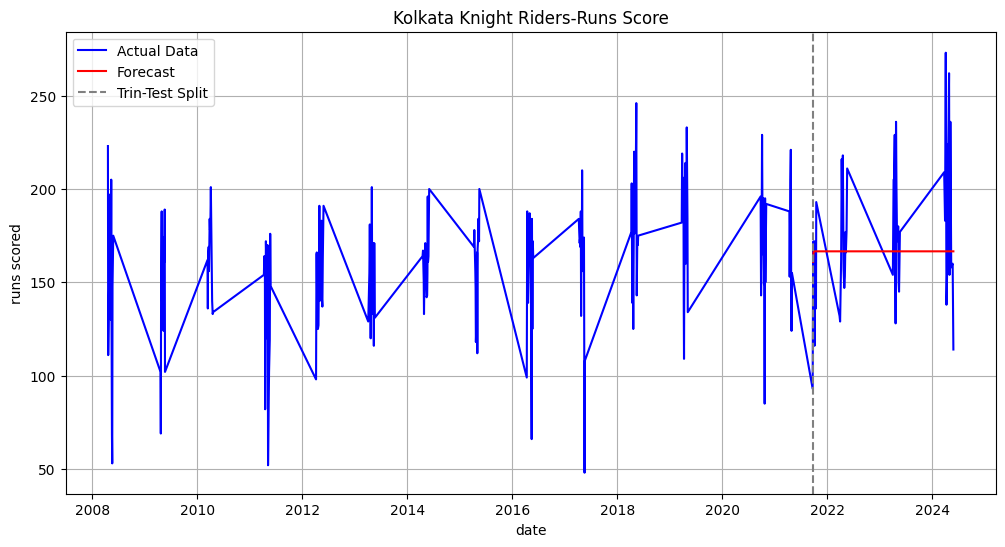

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(time_series_diff , label ='Actual Data', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.axvline(x=test.index[0], color='gray',linestyle='--', label='Trin-Test Split')
plt.title(f'{team_name}-Runs Score')
plt.xlabel('date')
plt.ylabel('runs scored')
plt.legend()
plt.grid()

plt.show()

In [ ]:
data = pd.read_csv('/content/deliveries.csv')
# filter the data
kohli_scores = data[data['batter'] == 'V Kohli']
kohli_matchwise_score = kohli_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
#kohli_matchwise_score

kohli_matchwise_score_sub=kohli_matchwise_score.head(239)
kohli_matchwise_score_sub

# prepare the data for ARIMA
kohli_matchwise_score_sub['match_number'] = range(len(kohli_matchwise_score_sub))
kohli_matchwise_score_sub.set_index('match_number', inplace=True)
#kohli_matchwise_score_sub

# fit the ARIMA model
model=ARIMA(kohli_matchwise_score_sub['batsman_runs'], order=(1,1,1))
model_fit=model.fit()

# forecast the performance
forecast=model_fit.forecast(steps=5)
print(forecast)

19    17.287512
20    16.728700
21    16.971238
22    16.865971
23    16.911659
Name: predicted_mean, dtype: float64


<ipython-input-19-e3918a82ba63>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_matchwise_score_sub['match_number'] = range(len(kohli_matchwise_score_sub))


In [ ]:
kohli_matchwise_score.iloc[239:]
kohli_matchwise_score

,match_id,batsman_runs
0,335982,1.0
1,335985,23.0
2,335992,13.0
3,335996,12.0
4,335998,1.0
5,336002,9.0
6,336006,34.0
7,336012,0.0
8,336016,21.0
9,336023,3.0


In [ ]:
# prompt: find the total runs of each batter and find the 5 top batter

import pandas as pd

# Load the deliveries dataset
deliveries_df = pd.read_csv('/content/deliveries.csv')

# Group by batter and count the number of runs
batter_runs = deliveries_df.groupby('batter')['batsman_runs'].sum()

# Sort the batters by runs scored in descending order
top_batters = batter_runs.sort_values(ascending=False).head(5)

# Print the top 5 batters and their total runs
print("Top 5 Batters and their Total Runs:")
top_batters

Top 5 Batters:
batter
SK Raina         685.0
G Gambhir        674.0
AC Gilchrist     658.0
ST Jayasuriya    651.0
YK Pathan        634.0
Name: batsman_runs, dtype: float64


<ipython-input-12-a92d07d8e536>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_scores_subset['match_number'] = range(1, len(batter_scores_subset) + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-pa


Forecasted Runs for SK Raina:
22    35.178748
23    35.221932
24    35.227267
25    35.227926
26          NaN
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-12-a92d07d8e536>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_scores_subset['match_number'] = range(1, len(batter_scores_subset) + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An 


Forecasted Runs for G Gambhir:
22    27.647439
23    26.764767
24    26.882049
25    26.866466
26          NaN
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-12-a92d07d8e536>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_scores_subset['match_number'] = range(1, len(batter_scores_subset) + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An 


Forecasted Runs for AC Gilchrist:
23    29.820775
24    30.034153
25    30.012047
26    30.014337
27          NaN
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-12-a92d07d8e536>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batter_scores_subset['match_number'] = range(1, len(batter_scores_subset) + 1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An 


Forecasted Runs for ST Jayasuriya:
21    34.086395
22    33.142214
23    32.899141
24    32.836564
25          NaN
Name: predicted_mean, dtype: float64

Forecasted Runs for YK Pathan:
23    26.552502
24    30.380852
25    28.857295
26    29.463620
27          NaN
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
